## To predict whether a person will have diabetes or not.

In [26]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
## Load the data

df = pd.read_csv('diabetes1.csv')

### Basic Checks 

In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [30]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
# Observation

#1) No missing values
#2)0 value not possible for glucose,BP,skin thickness and insulin.This is called as data corruption

### Domain Analysis.

### Exploratory Data Analysis

In [33]:
#Step 1 Univariate Analysis

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Pregnancies', ylabel='count'>

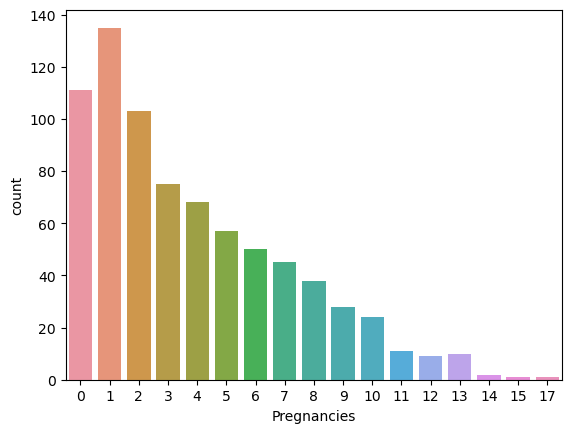

In [34]:
sns.countplot(x='Pregnancies',data=df)


In [35]:
# Observation

# Maximum patients have conceived  1 and 0 times.

In [36]:
df.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

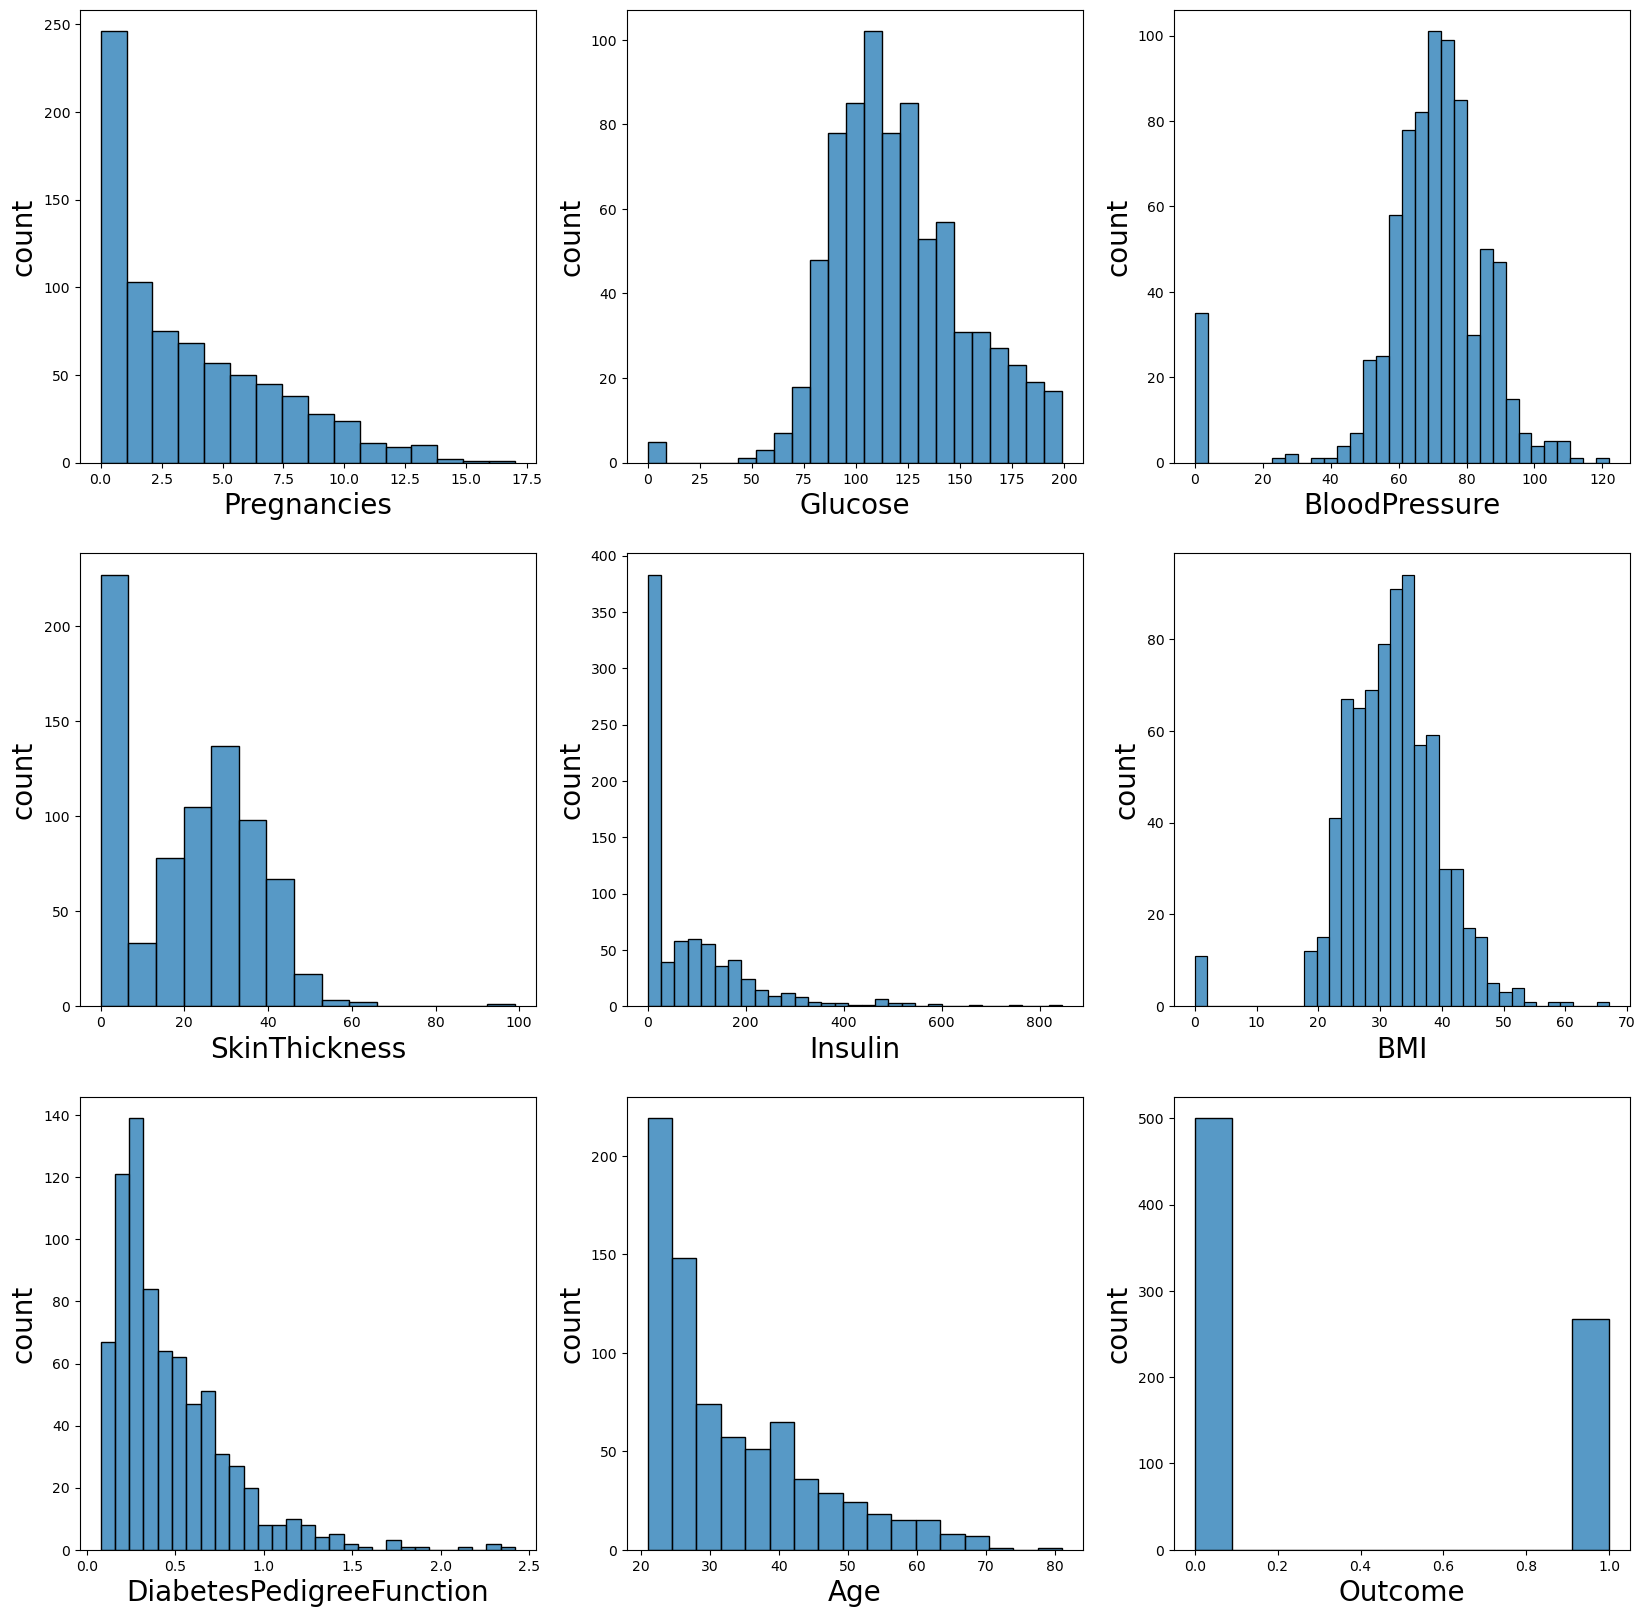

In [37]:
plt.figure(figsize=(20,20))
plotnumber=1

for i in df.columns:
    plt.subplot(3,3,plotnumber)
    sns.histplot(df[i])
    plt.xlabel(i,fontsize=20)
    plt.ylabel('count',fontsize=20)
    plotnumber += 1

<Axes: xlabel='Pregnancies', ylabel='count'>

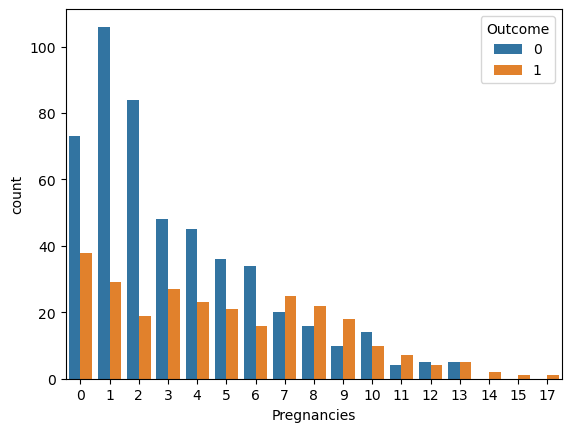

In [38]:
##Bivariate Analysis refers to plots between input variables and target variable.

## Analyzing how preganancies impact the patient with diabetes.

sns.countplot(x='Pregnancies',hue='Outcome',data=df)


In [39]:
# Observation

# 1)If the pateint is preganent,she will get diabetes.But after analyzing this data,we found as the no of pregnenacy increases chances of getting diabetes also increases.
# 2)At from 14 to 17 pregnancies all women are diabetic.

<Axes: xlabel='Glucose', ylabel='Count'>

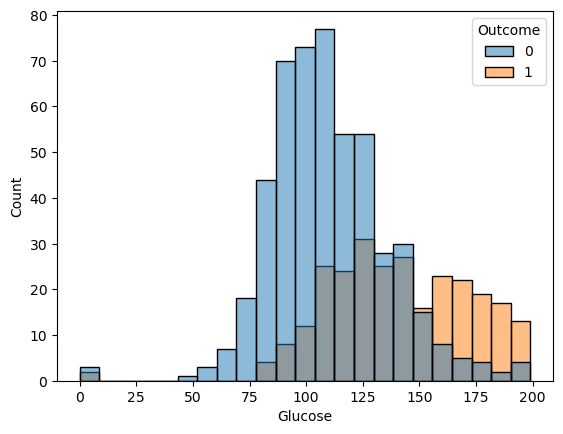

In [40]:
## Aanlyzing the relationship between diabetes and Glucose

sns.histplot(x='Glucose',hue='Outcome',data=df)


C:\Users\Neha Gupta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


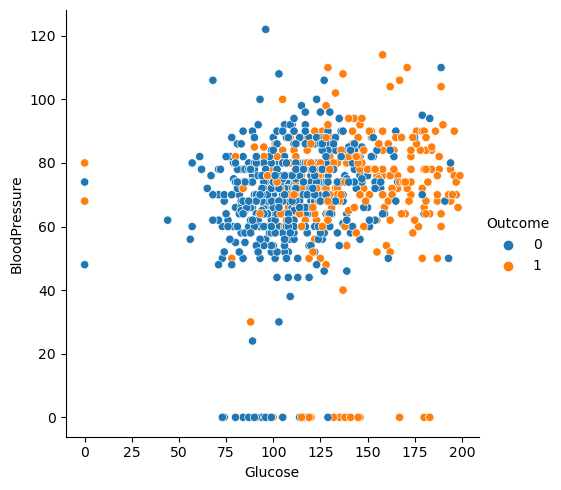

In [41]:
## Analyze Glucose with blood pressure

sns.relplot(x='Glucose',y='BloodPressure',hue='Outcome',data=df)
plt.show()

C:\Users\Neha Gupta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


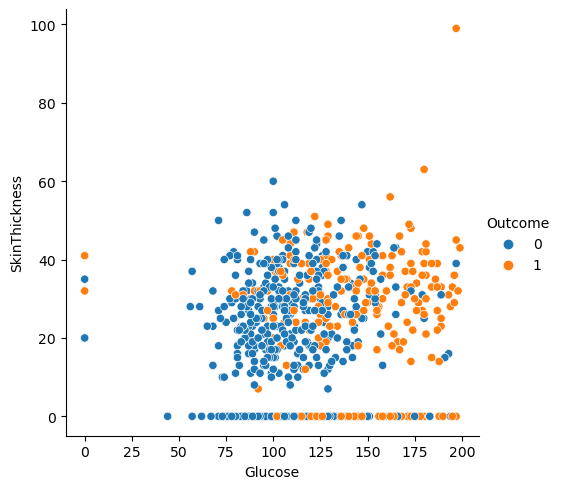

In [42]:
## Analyze Glucose with SkinThickness

sns.relplot(x='Glucose',y='SkinThickness',hue='Outcome',data=df)
plt.show()

<Axes: xlabel='BloodPressure', ylabel='Count'>

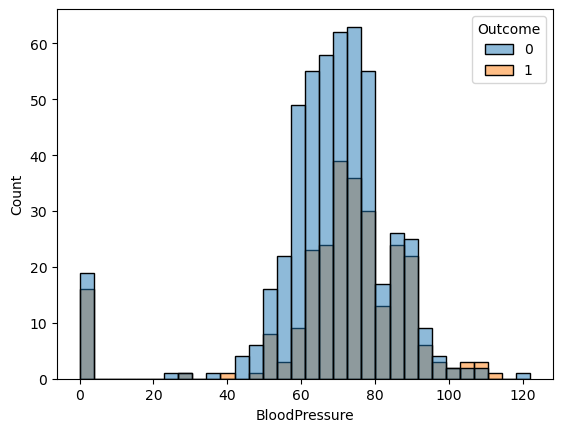

In [43]:
## Analyze relationship between BloodPressure and Outcome

sns.histplot(x='BloodPressure',hue='Outcome',data=df)

C:\Users\Neha Gupta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


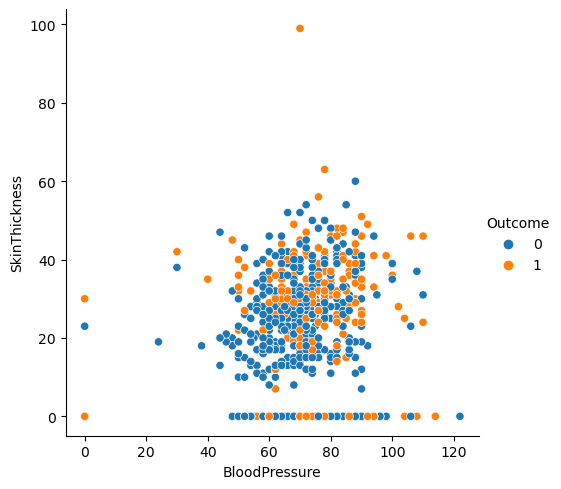

In [44]:
## Analyze BP with SkinThickness

sns.relplot(x='BloodPressure',y='SkinThickness',hue='Outcome',data=df)
plt.show()

C:\Users\Neha Gupta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


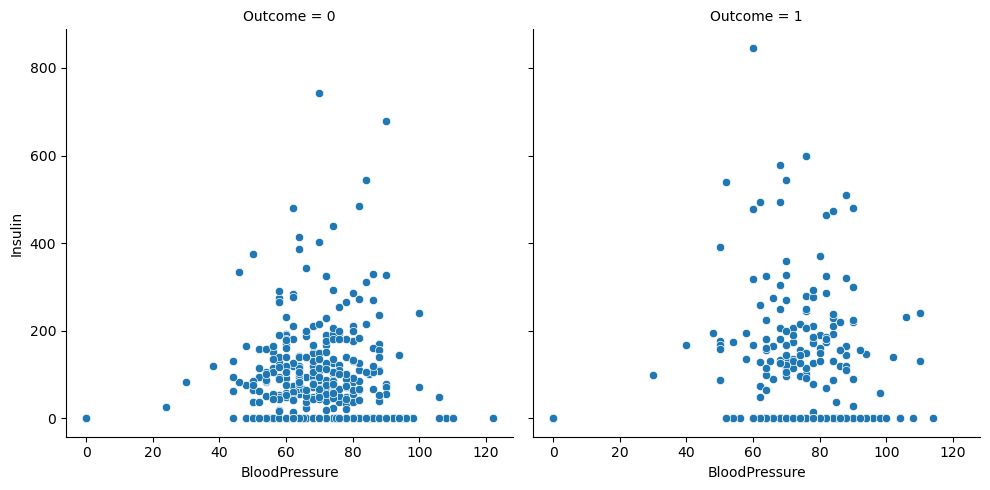

In [45]:
## Analyze BP with Insulin

sns.relplot(x='BloodPressure',y='Insulin',col='Outcome',data=df)
plt.show()

<Axes: xlabel='Insulin', ylabel='Count'>

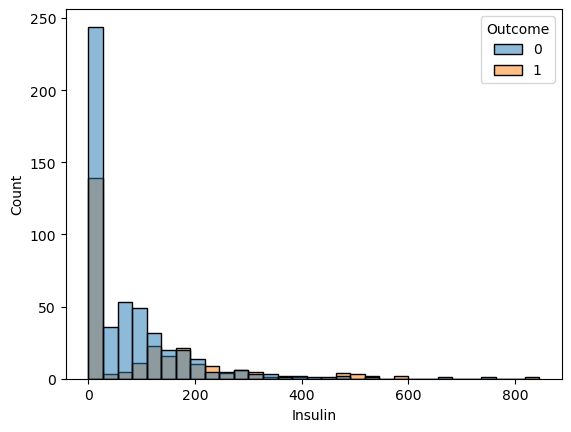

In [46]:
## Analyzing Insulin with target
sns.histplot(x='Insulin',hue='Outcome',data=df)

## Data Preprocessing and Feature Engineering.

In [47]:
#Step 1 Handling the missing values

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [48]:
## Step 2 Handling the corrupted data.
## In 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI' certain datapoints are zero.
df.Glucose.replace(0,np.median(df.Glucose),inplace=True)

#dataframe.colum.replace('Value to be replaced','By what value')


In [49]:
df.loc[df['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [50]:
df.BloodPressure.replace(0,np.median(df.BloodPressure),inplace=True)

df.SkinThickness.replace(0,np.median(df.SkinThickness),inplace=True)

df.Insulin.replace(0,np.median(df.Insulin),inplace=True)

df.BMI.replace(0,np.median(df.BMI),inplace=True)

In [51]:
## Step 3:-Numerical representation of string data

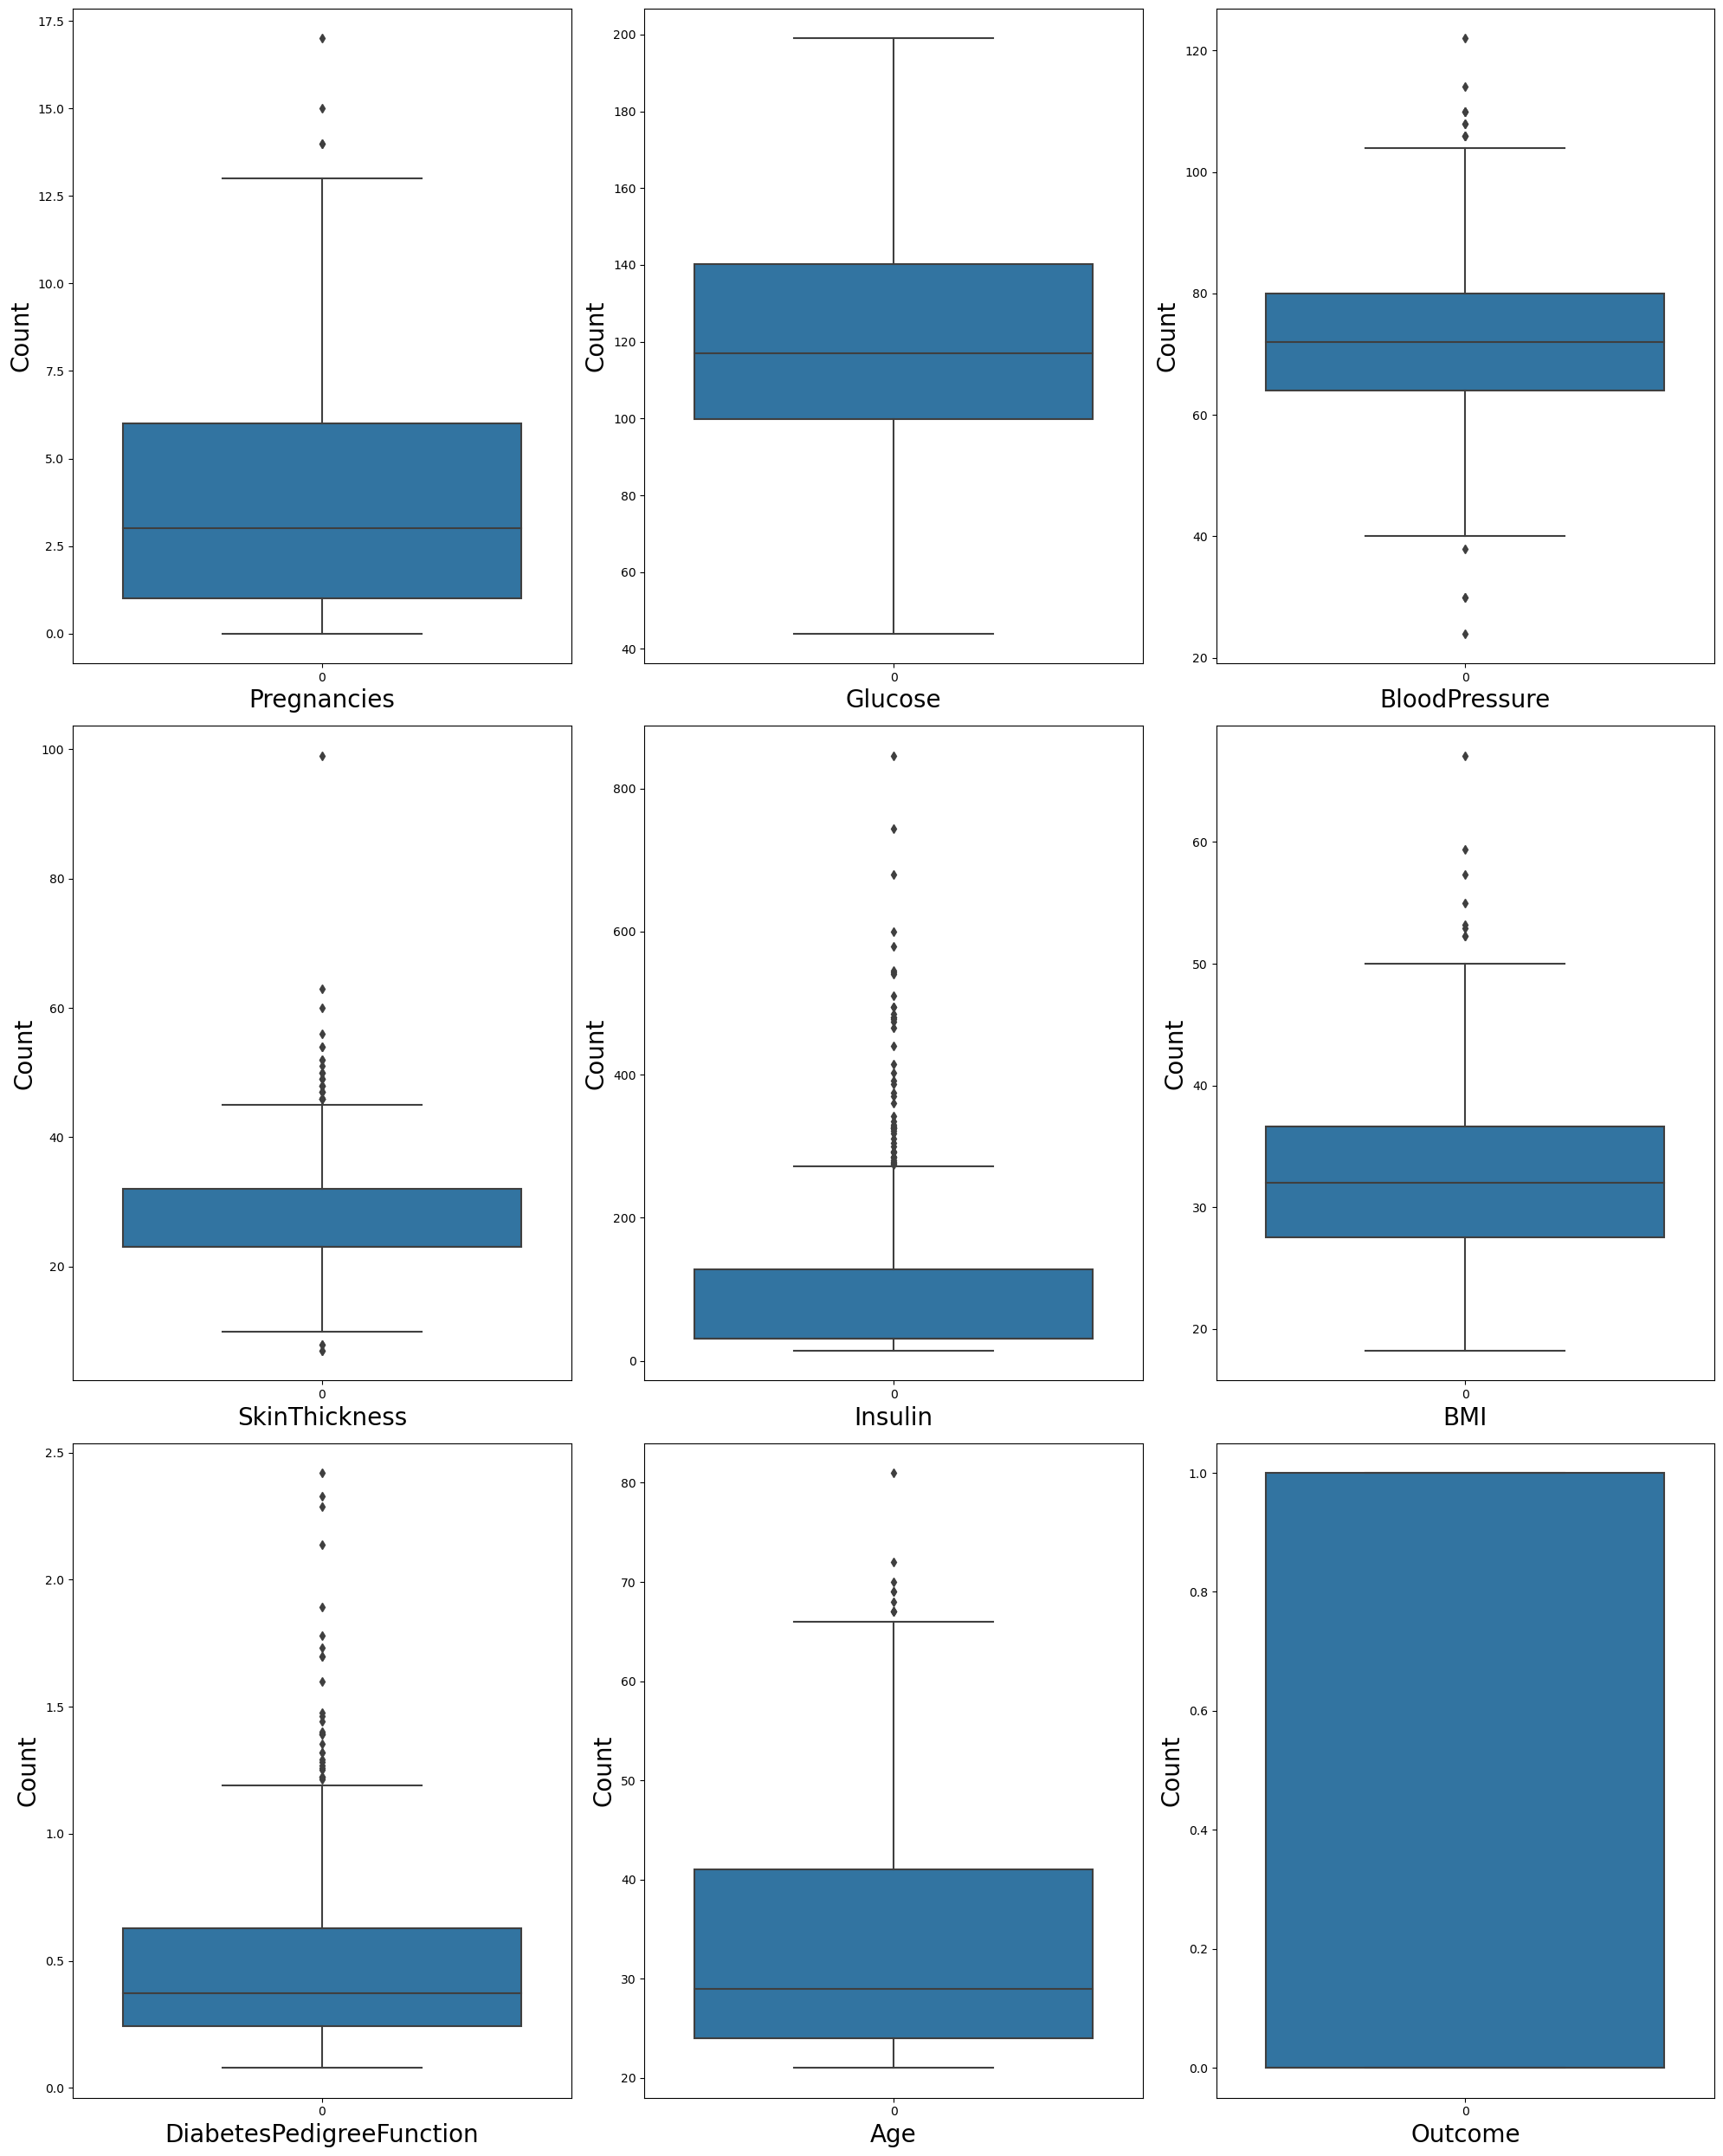

In [52]:
## Step 4:-Checking the outliers

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [53]:
## Step 5:-Scaling the data

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
dl=['Pregnancies','Outcome']
data1=sc.fit_transform(df.drop(dl,axis=1))


In [54]:
con_data=df[['Pregnancies','Outcome']]


In [55]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [56]:
type(data1)
data2=pd.DataFrame(data1,columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [57]:
final_df=pd.concat([data2,con_data],axis=1)

In [58]:
final_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,6,1
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,1,0
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,8,1
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,1,0
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,0,1
...,...,...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,10,0
764,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000,2,0
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,5,0
766,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333,1,1


## Feature  Selection

<Axes: >

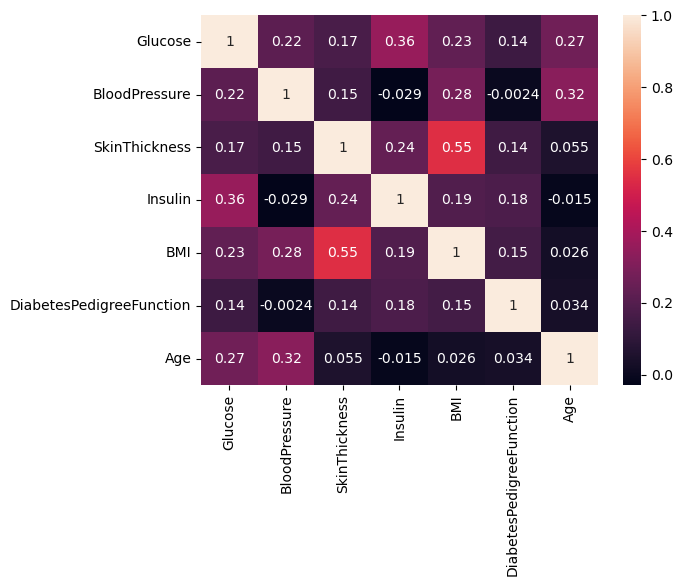

In [59]:
## No redundant fetaures
## We will check correlation

sns.heatmap(data2.corr(),annot=True)

# So no correlation hence no features should be 

## Model Creation

In [60]:
## Step 1 Creating independent and dependent variable.

X=final_df.iloc[:,:-1]
y=final_df.Outcome

In [61]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [62]:
## Step 2 Creating training and testing data.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=45)

In [63]:
y_test

195    1
51     0
66     1
437    0
665    0
      ..
671    0
422    0
742    0
331    0
699    0
Name: Outcome, Length: 192, dtype: int64

In [64]:
## Step 3 Model creation

from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)  ## training

LogisticRegression()

In [65]:
## Step 4 Prediction

y_pred=clf.predict(X_test)

In [66]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [67]:
y_pred_prob=clf.predict_proba(X_test)

In [68]:
y_pred_prob

array([[0.33743389, 0.66256611],
       [0.90164492, 0.09835508],
       [0.740058  , 0.259942  ],
       [0.53963051, 0.46036949],
       [0.81026035, 0.18973965],
       [0.85484529, 0.14515471],
       [0.54407058, 0.45592942],
       [0.9242643 , 0.0757357 ],
       [0.36227241, 0.63772759],
       [0.91519934, 0.08480066],
       [0.24509263, 0.75490737],
       [0.53439685, 0.46560315],
       [0.94236849, 0.05763151],
       [0.44039766, 0.55960234],
       [0.73456378, 0.26543622],
       [0.90467069, 0.09532931],
       [0.06517116, 0.93482884],
       [0.60883675, 0.39116325],
       [0.38320038, 0.61679962],
       [0.91370945, 0.08629055],
       [0.65556596, 0.34443404],
       [0.7178171 , 0.2821829 ],
       [0.57393877, 0.42606123],
       [0.82546245, 0.17453755],
       [0.7988021 , 0.2011979 ],
       [0.36473673, 0.63526327],
       [0.8577693 , 0.1422307 ],
       [0.33566192, 0.66433808],
       [0.22691992, 0.77308008],
       [0.83253213, 0.16746787],
       [0.

In [69]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## Evaluation of Model

In [70]:
from sklearn.metrics import (confusion_matrix,accuracy_score,recall_score,

precision_score,classification_report,f1_score)

In [71]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[113  17]
 [ 31  31]]


In [72]:
recall=recall_score(y_test,y_pred)
recall

0.5

In [73]:
precision=precision_score(y_test,y_pred)
precision

0.6458333333333334

In [74]:
f1score=f1_score(y_test,y_pred)
f1score

0.5636363636363636

In [75]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       130
           1       0.65      0.50      0.56        62

    accuracy                           0.75       192
   macro avg       0.72      0.68      0.69       192
weighted avg       0.74      0.75      0.74       192



In [76]:
y_test.value_counts()

Outcome
0    130
1     62
Name: count, dtype: int64